# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web enlazada en el campus virtual, y de título "Países por población: pasado, presente y futuro" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [1]:
# Una configuración de visualización
import visual_style
visual_style.customize_mpl()
visual_style.customize_css()

# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Setting custom matplotlib visual style
Setting custom CSS for the IPython Notebook


/home/masterbigdata/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

In [2]:
# Ojo, en este documento html el separador de miles es un punto
source = 'https://web-beta.archive.org/web/20150920073507/https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_poblaci%C3%B3n_pasada,_actual_y_futura'
tablas = pd.read_html(io=source, match=u'País o territorio', header=0, index_col=1,thousands='.')

# Utilizamos la etiqueta 'País o territorio' para filtrar las tablas de interés


# Imprimimos el número de tablas que hemos leído mediante la función len(). Deberían ser 3.
len(tablas)


3

## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas join(), merge(), o concat(), extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método head() para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [3]:
# Reunimos las tres tablas en una sola.
df0 = pd.merge(left=tablas[0], right=tablas[1], left_index=True, right_index=True)
df = pd.merge(left=df0, right=tablas[2], left_index=True, right_index=True)


# Imprimimos las primeras filas a modo de comprobación, mediante head()
df.head(2)

# Generamos una lista con la información almacenada en las columnas mediante list()
attrs=list(df)
validattrs = [x for x in attrs if x.isdigit()]
validattrs

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric() 
# Puede ser útil el utilizar la noción de 'list comprehension' por sencillez


# Leemos la tabla por fechas y la almacenamos para su uso. Imprimimos para verificar que es correcto


datos = df.filter(validattrs)
datos

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
País o territorio,,,,,,,,,,,,,,,,,,,,,
Afganistán,8150,8891,9829,10998,12431,14132,15044,13120,13568,19445,...,26335,29121,32564,36644,41117,45665,50195,54717,59255,63795
Albania,1227,1392,1623,1884,2157,2401,2671,2957,3245,3158,...,3025,2987,3029,3075,3105,3103,3062,2994,2912,2824
Alemania,68375,70196,72481,75639,77783,78682,78298,77685,79380,81654,...,82439,81644,80854,80160,79226,78022,76589,74984,73276,71542
Andorra,6,6,8,14,20,27,34,45,53,63,...,76,85,86,86,85,84,83,81,78,75
Angola,4118,4423,4797,5135,5606,6050,7206,8390,9485,11000,...,14770,17043,19625,22484,25673,29155,32910,36948,41280,45888
Anguila (RU),5,5,6,6,6,6,7,7,8,10,...,13,15,16,18,20,21,23,24,26,27
Antigua y Barbuda,46,51,55,59,66,68,69,64,64,69,...,81,87,92,98,104,109,114,117,120,123
Arabia Saudita,3860,4243,4718,5327,6109,7208,10022,13330,16061,18755,...,23642,25732,27752,29819,31877,33825,35614,37250,38781,40251
Argelia,8893,9842,10909,11963,13932,16140,18806,22008,25089,28089,...,32561,34586,36640,38594,40290,41641,42663,43425,43940,44163


## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [4]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc

datos.loc[['Alemania', 'Andorra', 'Angola'],['2015', '2020', '2025']]



,2015,2020,2025
País o territorio,,,
Alemania,80854,80160,79226
Andorra,86,86,85
Angola,19625,22484,25673


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [5]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc

datos.iloc[2:8,4:9]


,1970,1975,1980,1985,1990
País o territorio,,,,,
Alemania,77783,78682,78298,77685,79380
Andorra,20,27,34,45,53
Angola,5606,6050,7206,8390,9485
Anguila (RU),6,6,7,7,8
Antigua y Barbuda,66,68,69,64,64
Arabia Saudita,6109,7208,10022,13330,16061


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [6]:
# Creamos una columna mediante selección por el título de la columna

datos.loc[:,'1955']

País o territorio
Afganistán                    8891
Albania                       1392
Alemania                     70196
Andorra                          6
Angola                        4423
Anguila (RU)                     5
Antigua y Barbuda               51
Arabia Saudita                4243
Argelia                       9842
Argentina                    18928
Armenia                       1565
Aruba (PB)                      54
Australia                     9277
Austria                       6947
Azerbaiyán                    3314
Bahamas                         87
Baréin                         130
Bangladesh o Bangladés       49588
Barbados                       227
Bielorrusia                   7781
Bélgica                       8868
Belice                          77
Benín                         1846
Bermudas (RU)                   41
Bolivia                       3074
Bosnia y Herzegovina          2974
Botsuana                       461
Brasil                       61774
Br

### Ejercicio 4
Imprimir los datos de la fila número 15.

In [7]:
# Seleccionamos una fila mediante la opción .ix

datos.ix[14]


1950     2885
1955     3314
1960     3882
1965     4567
1970     5169
1975     5696
1980     6198
1985     6845
1990     7497
1995     8051
2000     8463
2005     8825
2010     9302
2015     9781
2020    10206
2025    10534
2030    10781
2035    10974
2040    11117
2045    11201
2050    11210
Name: Azerbaiyán, dtype: int64

### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [8]:
# Seleccionamos una celda mediante la opción .ix
datos.ix[['Barbados'],['1995']]


,1995
País o territorio,
Barbados,268


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [9]:
# Utilizamos la función max() para calcular el máximo

datos['1975'].max()

917899

In [10]:
# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
datos['1975'].idxmax()


u'China'

### Ejercicio 7
Imprimir los nombres de las filas.

In [11]:
# Utilizamos la opción .index

datos.index

Index([u'Afganistán', u'Albania', u'Alemania', u'Andorra', u'Angola',
       u'Anguila (RU)', u'Antigua y Barbuda', u'Arabia Saudita', u'Argelia',
       u'Argentina',
       ...
       u'Uruguay', u'Uzbekistán', u'Vanuatu', u'Venezuela', u'Vietnam',
       u'Wallis y Futuna (Francia)', u'Yemen', u'Yibuti', u'Zambia',
       u'Zimbabue'],
      dtype='object', name=u'País o territorio', length=228)

## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando las librerías matplotlib.

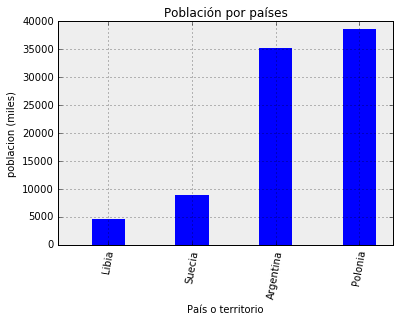

In [12]:
# Mediante la función plt.bar() de las librerías matplotlib

diccionario = {
    'Libia': datos.loc['Libia','1995'],
    'Suecia': datos.loc['Suecia','1995'],
    'Argentina': datos.loc['Argentina','1995'],
    'Polonia': datos.loc['Polonia','1995']
}

valoresorden = sorted(diccionario.values())
paisesorden = sorted(diccionario.keys(), key=diccionario.__getitem__)

posicionesX = np.arange(len(diccionario.values()))

barwidth = 0.4
plt.bar(posicionesX + barwidth, valoresorden, barwidth)
plt.xticks(posicionesX + barwidth*1.5, paisesorden, rotation=80)

#plt.margins(0.1, 0, tight=True)
plt.ylim(ymax=40000)
plt.title(u"Población por países")
plt.ylabel('poblacion (miles)')
plt.xlabel(u"País o territorio")


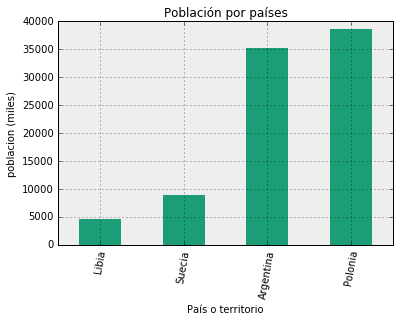

In [13]:
# Generamos una lista con los nombres de los países del enunciado
paises=['Libia', 'Suecia', 'Argentina', 'Polonia']

# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
subtabla=datos.loc[paises,['1995']]

# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar    
subtabla.sort_values('1995', inplace=True)

plot=subtabla.plot(kind='bar', legend=False, title=u"Población por países", colormap="Dark2", rot=80)
plot.set_ylabel('poblacion (miles)')


# Podemos utilizar plt.ylabel() para especificar 'población (miles)'


## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

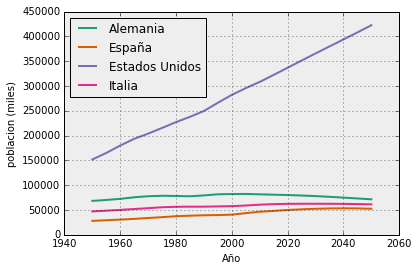

In [14]:
# Mediante la función plot de las librerías matplotlib
paises=['Alemania', u'España', 'Estados Unidos', 'Italia']

sub = datos.loc[paises, :]
for index, row in sub.iterrows():
    plt.plot(list(row.keys()), list(row), label=index)
plt.legend(loc='upper left')
plt.ylabel('poblacion (miles)')
plt.xlabel(u'Año')
plt.show()



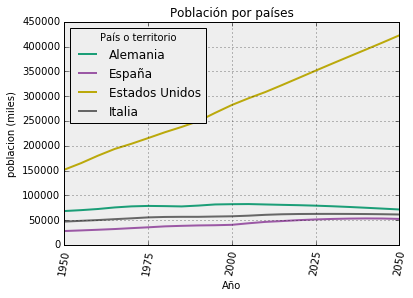

In [15]:
# Generamos una lista con los nombres de los países del enunciado
paises=['Alemania', u'España', 'Estados Unidos', 'Italia']

# Generamos la subtabla correspondiente con la opción .loc
subtabla=datos.loc[paises, :].transpose()

# Utilizamos la función plot(kind='line') para dibujar
plot=subtabla.plot(kind='line', legend=True, title=u"Población por países", colormap="Dark2", rot=80)

# Etiquetamos con plt.xlabel() y plt.ylabel()
plot.set_ylabel('poblacion (miles)')
plot.set_xlabel(u'Año')


## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los países más populosos en 2010, y otra con los países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

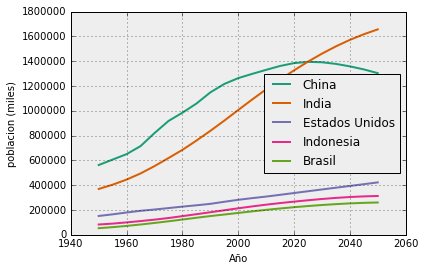

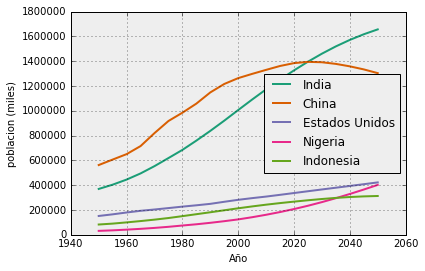

In [16]:
# Mediante la función plot de las librerías matplotlib
def plot_populosos(datos, ano):
    sub = datos.sort_values(ano, ascending=False, inplace=False).head(5)
    for index, row in sub.iterrows():
        plt.plot(list(row.keys()), list(row), label=index)
    plt.legend(loc='center right')
    plt.ylabel('poblacion (miles)')
    plt.xlabel(u'Año')
    plt.show()

plot_populosos(datos, '2010')
plot_populosos(datos, '2050')

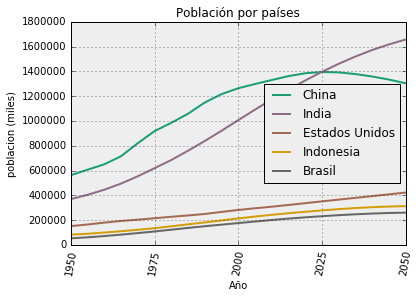

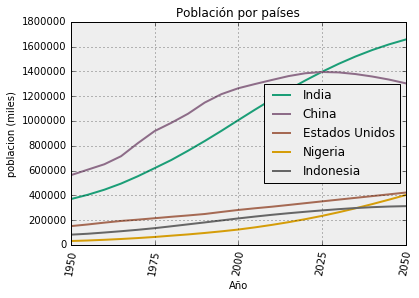

In [17]:
# Definimos la función plot_populosos()
def plot_populosos(datos, ano):
    sub = datos.sort_values(ano, ascending=False, inplace=False).head(5).transpose()
    plot = sub.plot(kind='line', legend=True, title=u"Población por países", colormap="Dark2", rot=80)
    plot.set_ylabel('poblacion (miles)')
    plot.set_xlabel(u'Año')
    plot.legend(loc='center right')

plot_populosos(datos, '2010')
plot_populosos(datos, '2050')

## Fdo: Mario Losantos